# Introductions to the Support Vector Machine (SVM)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from AuxFunctions import plot_confusion_matrix

## What is an SVM?

Its a supervised learning model that seeks to divide classes of data. In other words, if I want to build an SVM to classify cats and dogs, then it will need to figure out a way to draw a line that divides cat and dog datapoints. I need to figure out a DECISION BOUNDARY

In more general terms, we can say that an SVM seeks to draw a hyperplane in an N-dimensional space that classifies data. What does this exactly mean?

For a 2-D space, the "hyperplane" will just be a line, as shown below:

<img src="https://pimages.toolbox.com/wp-content/uploads/2022/09/02134804/Diagram-depicting-SVM-example-with-hyperplane-for-classification-problem.jpg" width="400px">

For a 3-D space, the "hyperplane" is an actual plane, as shown below:

<img src="https://miro.medium.com/max/784/0*QDy2DTKEtPvoP_n_.png" width="400px">

However, what happens when problems get a bit more messy? Perhaps we can apply some sort of transformation? Let's first look at a simple transform.

What about going into higher dimensions?

Let's look at this problem child:

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Wp8tGecatxHqUgHNaVQddg.png" width = 400px>

We can go from a 2-D space to a 3-D space

<img src="https://miro.medium.com/max/720/1*XhXJldwvZ9IpGNts41Mefw.gif" width = 400px>

So we had a problem: non-linearly separable data. To solve the problem, we moved into a higher dimensional space where we could then come up with a better hyperplane.

However, using simple functions can be costly, especially when we move into higher dimensional spaces. What if, for instance, we seek to move into an infinite dimensional space? The function mapping becomes a bit too difficult to work with. We need to find some sort of computational simplification.

## Kernels



We will not be looking at the precise math behind the SVM, so this next section may be a bit hand-wavy. A bit of trust is required.

Due to how SVMs are constructed, we do not actually need to know exactly how a function transforms a data point. In other we words for a given set of data with class x and class y, we don't need to know how $x \rightarrow f(x)$ or how $y \rightarrow f(y)$.

The only thing we really care about is how $f(x)$ and $f(y)$ compare to one another (remember we are just trying to separate classes). In other words, we only really want to know the result of the inner (or dot) product of $f(x)$ and $f(y)$. Thus, we will designate some kernel function:

$k(x, y) = f(x) \cdot f(y)$

Let us see why this can simplify things. We'll examine a commonly used function, the polynomial function. For some set of x and y, we will have the polynomial function

$f(x, y) = x + y + xy+ x^2 + y^2$

However, the polynomial kernel is simply:
$k(x, y) = (1 + x \cdot y)^2$

This point can be illustrated with another common kernel, the Radial Basis Function (RBF)

$f(x, y) =$ some infinite dimensional mapping that we can't really compute

$k(x, y) = e^{-\gamma||x - y||^2}$ where $\gamma$ is a value sets the spread of the kernel function

We only care about the pairwise similarity comparisons of our data, and so we do not need to explicitly apply any transformations to our data and try and represent it in weird higher dimensional feature spaces. We can just use the kernel trick to simplify things a whole lot.

## The vector interpretation of a kernel

Remember how a support vector machine has to do with vectors? Let's talk about SVMs and vectors a bit more. We'll up the complexity of what an SVM is. Let's look at a new figure:

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*ecA4Ls8kBYSM5nza.jpg" width = 600px>



This time, our decision boundary has a margin to it, aka how far away are the data points from the bound. Ideally, we want a decision boundary with a large margin.
We can think of the points closest to the hyperplane as the support vectors. Whats a vector again? Its just a quantity with a direction and a magnitude. We typically draw them as little arrows.

Our support vectors are key to generating a robust and accurate SVM as we can use these support vectors to maximize the margin. In fact, we can actually express the decision boundary as a sum of support vectors!

**So then in this formalism, what exactly is a kernel?** Before we get to that, a quick definition

*Definition: Vector Space*: A set of vectors and a set of scalars that are closed under vector addition and scalar multiplication. What does this mean? A vector space basically consists of a set of vectors that we can add and a set of scalars that we can multiply the vectors by.

Here's an example of a vector space: Let's designate some 3x1 column matrices:

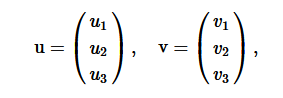

We can designate the following vector space:

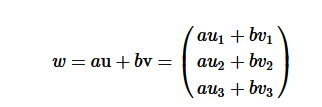

The set of all 3x1 matrices and the set of real number form a vector space. This one is commonly referred to as $\mathbb{R}^3$

**The Kernel**

The kernel takes in some input vectors in their original space and gives us back the inner product of the vectors in a different feature space. It can take inputs from a lower dimensional vector space and return inner products of these inputs in a higher dimensional vector space.

**Let's restate everything with our new knowledge**

We have a set of data points that we want to classify with a decision boundary. We can pick a really good decision boundary by maximizing the margin of the decision boundary. To figure out how to do that, we need to analyze the support vectors, or the data points that are closest to the decision boundary, and adjust accordingly. 

However, sometimes a convenient decision boundary cannot be drawn and we will need to go to higher dimensional vector spaces to be able to separate our data. Directly transforming all of our data can be quite costly, so we opt to use the kernel trick, which enables us to simply analyze the inner products of our lower dimensional input vectors in a higher dimensional vector space and generate a suitable decision boundary.

## Where does quantum mechanics factor into all of this?

Let's talk about quantum computers. They run on qubits instead of classical bits. What's the difference?

A classical bit is either a 1 or a 0. Its binary. A qubit is a bit more complicated. The quantum principal of superposition enables us to actually have bits that are a probabilistic mixture of both 1 and 0! Why is this powerful? Let's just look at the raw numbers for a second.

**Classical**: If each bit can only be a 1 OR a 0, then we will need two bits to represent each state. We can have:

$0$

$1$

**Quantum**: Since each qubit can be a 1 or a 0 or a probabilistic mixture of 1 and 0, we can represent the classical $0$ and the classical $1$ state with a single qubit.

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$

So we can reach all the states of two classical bits with just a single qubit. Let's scale up a bit. What happens if we have two classical bits?

**Classical**: Here are all the possible configurations:

$0, 0$

$0, 1$

$1, 0$

$1, 1$

**Quantum**:

$\ket{\psi_1}, \ket{\psi_2}$

So we have described four classical bits with two qubits. In general, $n$ qubits can take the values of $2^n$ classical bits. The amount of classical bits that are needed to model something can really blow up quite quickly, while qubits are much more compact. This is quite useful in a lot of cases. The most low-hanging of fruit is perhaps quantum chemistry simulations. 

WARNING!!!! It should be noted that we can't won't actually "own" all $2^n$ classical bits with only $n$ qubits. Sure, we can represent all of them, but when we perform a measurement, we will only get back a single configuration of bits, aka we will only measure one bit configuration. However, the fact that we can describe all of those classical configurations with only a few qubits is very powerful.

Here is a fun little thought:

To describe a system of n = 500, we would need $2^{500}$ classical bits, which is more than the estimated number of atoms in the universe.





### But what does this mean for our SVMs? 

Let's take a second to think about it

We can describe very very large vector spaces with our quantum formalism! With qubits, we effectively have a larger space for computation and we can get to very high dimensional vector spaces with not all too many qubits. This means that there are certain kernels that are classically difficult to calculate but can be made easier by a quantum computer.

As the feature spaces become very large (aka high in dimension), the kernel functions are classically very expensive to calculate. However, the quantum state vector space is exponentially large, so we can perform these calculations much more easily.

We can "cheaply" generate hyperplanes in quantum feature spaces for our SVMs that are classically too expensive or impossible.

https://arxiv.org/pdf/1804.11326.pdf

https://arxiv.org/pdf/2010.02174.pdf

https://arxiv.org/pdf/1307.0471.pdf

### Let's see some examples

So... We need some data that is easy for a quantum kernel to handle and hard for a classical kernel to handle. Researchers have already created such a dataset. Is that cheating? Maybe, but oh well...

https://qiskit.org/documentation/stable/0.24/tutorials/machine_learning/01_qsvm_classification.html

# Optical Neural Networks

**Motivating Question: Why is deep learning so expensive?**

Lots of really really big matrices (or tensors) are multiplied together lots and lots of times during the training of a neural network. Let's just take a quick peek on the very classic task of MNIST, handwritten digit classification

In [5]:
import torch
import torchvision

In [7]:
random_seed = 47
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
batch_size_train = 64
batch_size_test = 1000

In [8]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=True, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=False, download=True,
    transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
    (0.1307,), (0.3081,))
    ])),
    batch_size=batch_size_test, shuffle=True)

 11%|█         | 1114112/9912422 [00:00<00:00, 11035154.41it/s]

 63%|██████▎   | 6209536/9912422 [00:00<00:00, 34422151.31it/s]

Extracting /files/MNIST\raw\train-images-idx3-ubyte.gz to /files/MNIST\raw


9920512it [00:01, 6219292.73it/s]                              
0it [00:00, ?it/s]

Extracting /files/MNIST\raw\train-labels-idx1-ubyte.gz to /files/MNIST\raw
Extracting /files/MNIST\raw\t10k-images-idx3-ubyte.gz to /files/MNIST\raw


Extracting /files/MNIST\raw\t10k-labels-idx1-ubyte.gz to /files/MNIST\raw
Processing...


c:\Users\tyxia\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

1654784it [00:17, 96881.17it/s]
8192it [00:16, 486.48it/s]


In [10]:
example_data.shape

torch.Size([1000, 1, 28, 28])

With this simple dataset we already have a massive tensor of 1000 28x28 pixels... The quality of these images suck as well: 

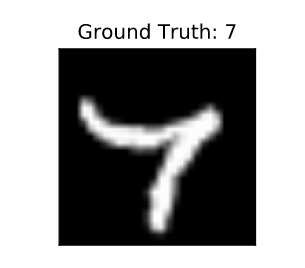

For more complicated tasks, we'll need more complex images. Imagine building a CNN for recognizing octopuses in images. We'll need images with a lot more pixels, which means bigger matrices:

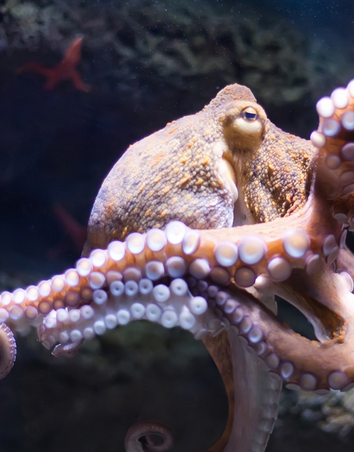


There's lots of work devoted to sorting this out: faster matrix multiplication methods, better hardware, etc. A major advancement in this area was graphical processing units (GPUs)

GPUs enabled massive parallel computation, which is extraordinarily useful for deep learning, as we often do the same computations lots and lots of times. How do they do this? Let's look at the architecture:

<img src="https://cdn.mos.cms.futurecdn.net/Rb6gY4uQszQRgoMQFCFZKT-970-80.jpg.webp" width = 900px>

Compared to a CPU:

<img src="https://www.techpowerup.com/img/15-04-28/82a.jpg" width = 900px>

There are immediate differences...

So GPUs are good at doing a lot of things fast because it has a lot of simple processing units that are capable of parallel computation. This is all well and good, but what might be a drawback of this? Let's look at this image and think about it:

<img src = "https://www.computerhope.com/cdn/video-card.jpg" width = 800px>

Maybe this can be helpful:

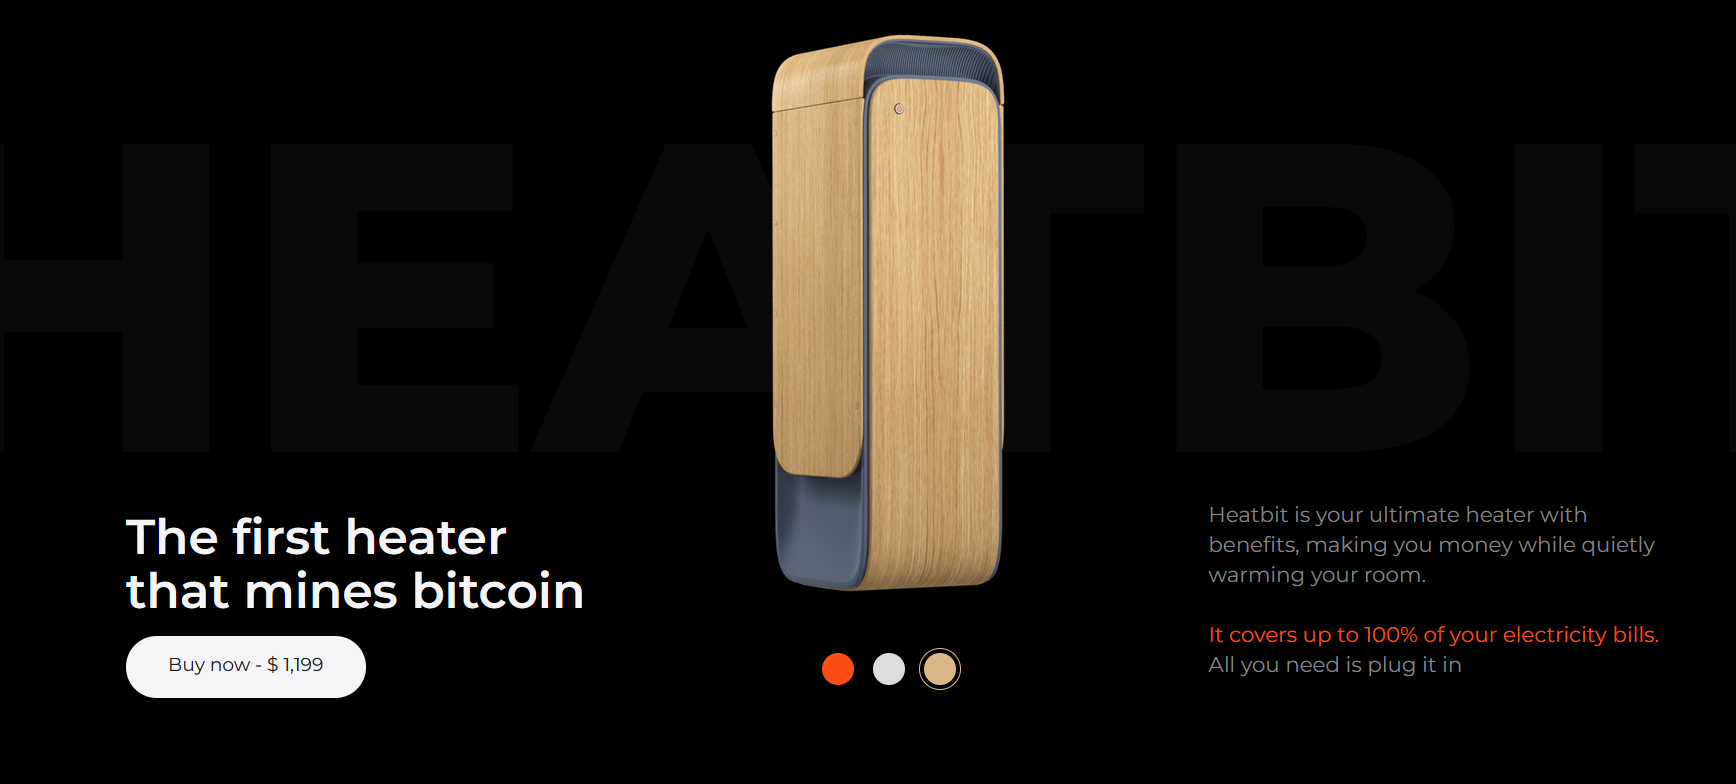

or this:

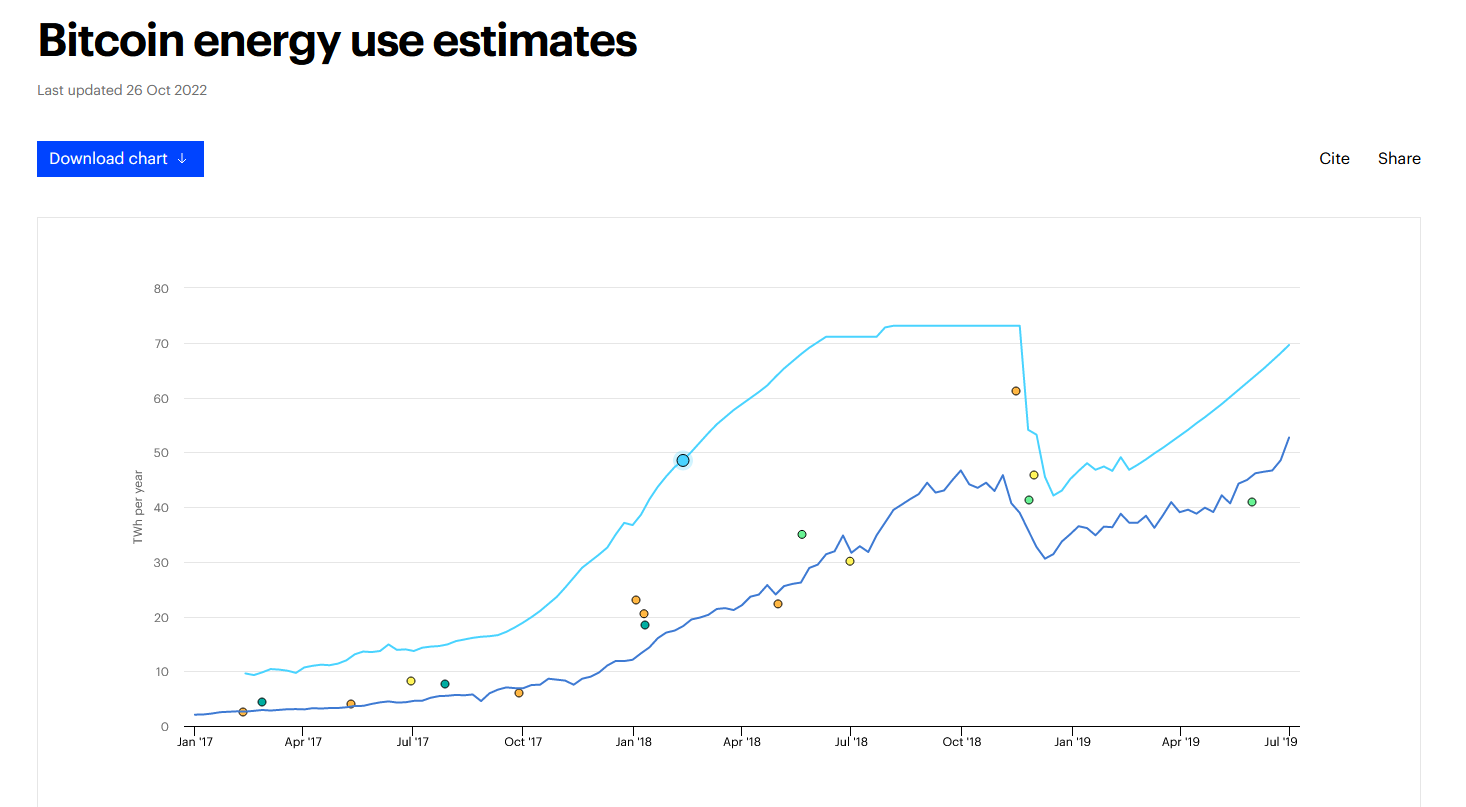

So the primary problems here are heating and electricity consumption. These same issues will follow the training of neural networks. We perform lots of operations, lots of times, and incur a pretty high cost. However, if we want more powerful computers, we will have to keep stacking more and more components onto our chips. Unfortunately, bottlenecks such as chip power consumption and cost begin to arise...

Some folks have tried to solve that problem with a new type of neural network

## Optical Neural Networks

What if we took artificial neural networks (our current version) and replaced the electrons with photons?

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Optical_logic_gate_with_diffractive_neural_network.png/545px-Optical_logic_gate_with_diffractive_neural_network.png" width = 600px>

A very high level overview: Light strikes and passes through a series of lenses, filters, and surfaces, before arriving at a final location on an output surface. The location at which it is incident on the surface determines the output.

Some advantages:
- Low power consumption: Only the input plane wave driver and the output readout requires electricity (hypothetically)
- Low heating: It's all just photons right?
- Low crosstalks: Photons propagating across free space will not interfere like electrical signals do
- Fast! Photons travel at the speed of light: Time delays and dispersions are far far lower

But... how do you represent matrix multiplication with light?

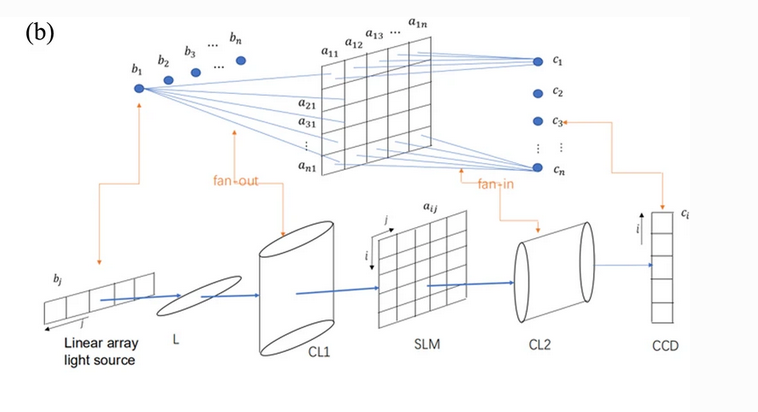

Let's say we want to perform the multiplication of the vector $b = [1, 0, 2]$ by the matrix $A = [[1,0,1][2,0,1][1,1,1]]$. We'll trace the above image:

1. We generate vector $b$ with an LED light source, representing each value with a varied luminous intensity
2. We load up matrix $A$ in a spatial light modulator. A spatial light modulator spatially varies the incident periodic waveform, causing things such as phase and amplitude changes. Here we are concerned with intensity, so our SLM will induce intensity changes on an incident beam
3. Now that we have our matrix and our vector set up, we have to perform the multiplication. We'll send the beam that represents vector $b$ through a collimating lens
   1. <img src = "https://cdn.britannica.com/09/158609-050-7730CD21/collimator-light-point-source-beam.jpg" width = 400px>
   2. A collimator takes a strongly diverging light beam and forces it to only propagate in one direction, limiting the divergence.
4. The collimated light travels to the first column lens, causing it to diverge out and fit the dimension of the spatial light modulator
5. The light travels through the spatial light modulator and is "multiplied"
6. The output from the spatial light modulator is focused with another column lens and then read by a camera

This is a fairly baseline implementation of matrix multiplication. There are other ways that are quite clever. Here's one where we do matrix multiplication with 2D convolutions: 

https://medium.com/@_init_/an-illustrated-explanation-of-performing-2d-convolutions-using-matrix-multiplications-1e8de8cd2544

Some layers:

<img src = "https://www.photonics.com/images/Web/Articles/2018/8/3/thumbnail_63751.jpg" width = 500px>

So we now have a matrix multiplication engine, we now need an activation function. We'd like one that is nonlinear which can be a bit of a challenge. The reason for this is that oftentimes these nonlinear components need to be able to handle the high-power laser that drives operations. Furthermore, there are non-ideal characteristics in many current forms of known optical nonlinearity, which will mangle the signal that goes into it.

How do we resolve this bottleneck?
1. Low hanging fruit: Electro-optical neural networks
2. Saturated absorption
   1. When light is incident on a medium, absorption occurs
   2. As light intensity increases, absorption coefficient of the medium decreases
   3. Eventually, when the incident light reaches a high enough intensity, the medium will SATURATE
   4. This causes it to change behavior from its unsaturated form
   5. 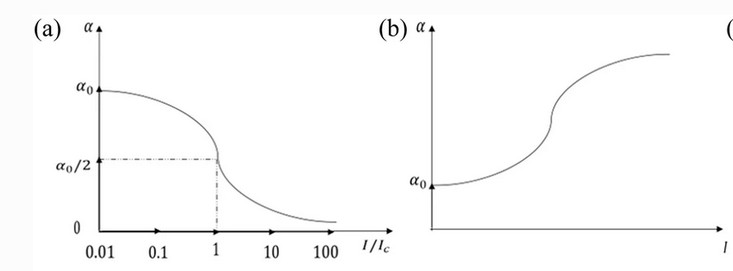 Hey look its sort of a sigmoid function
3. Phase Change Materials
   1. When PCMs undergo a solid-state phase transition, their optical properties slightly change
   2. For example, the material Ge2Sb2Te5 has an index of refraction of -4.7. When it undergoes a phase change, it has an index of refraction of -7.5
   3. If we tune this accordingly, perhaps we can get a ReLU or GeLU?
      1. <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/1280px-ReLU_and_GELU.svg.png" width = 400px>

### Case Study: A fun chance for parallelism in Optical Recurrent Neural Networks

One particularly nice part of ONNs is that they can apply much of the existing telecom manufacturing and algorithm techniques that we currently use. We'll take a look at how this can speed up some of our artificial neural networks.